In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random

import serial
import time

In [28]:
channel = 8
window_size = 300

In [22]:

signal = []
hand = []

def read_record_file(file):
    global signal
    global hand
    
    left = []
    right = []
    with open(file, "r") as sig:
        for line in sig:
            line = line.split(",")
            left.append([float(val) for val in line[:8]])
            right.append([float(val) for val in line[8:16]])

    signal = np.reshape(left, (len(left), 8))
    hand = np.reshape(right, (len(right), 8))
    
read_record_file("signal_predict2.txt")


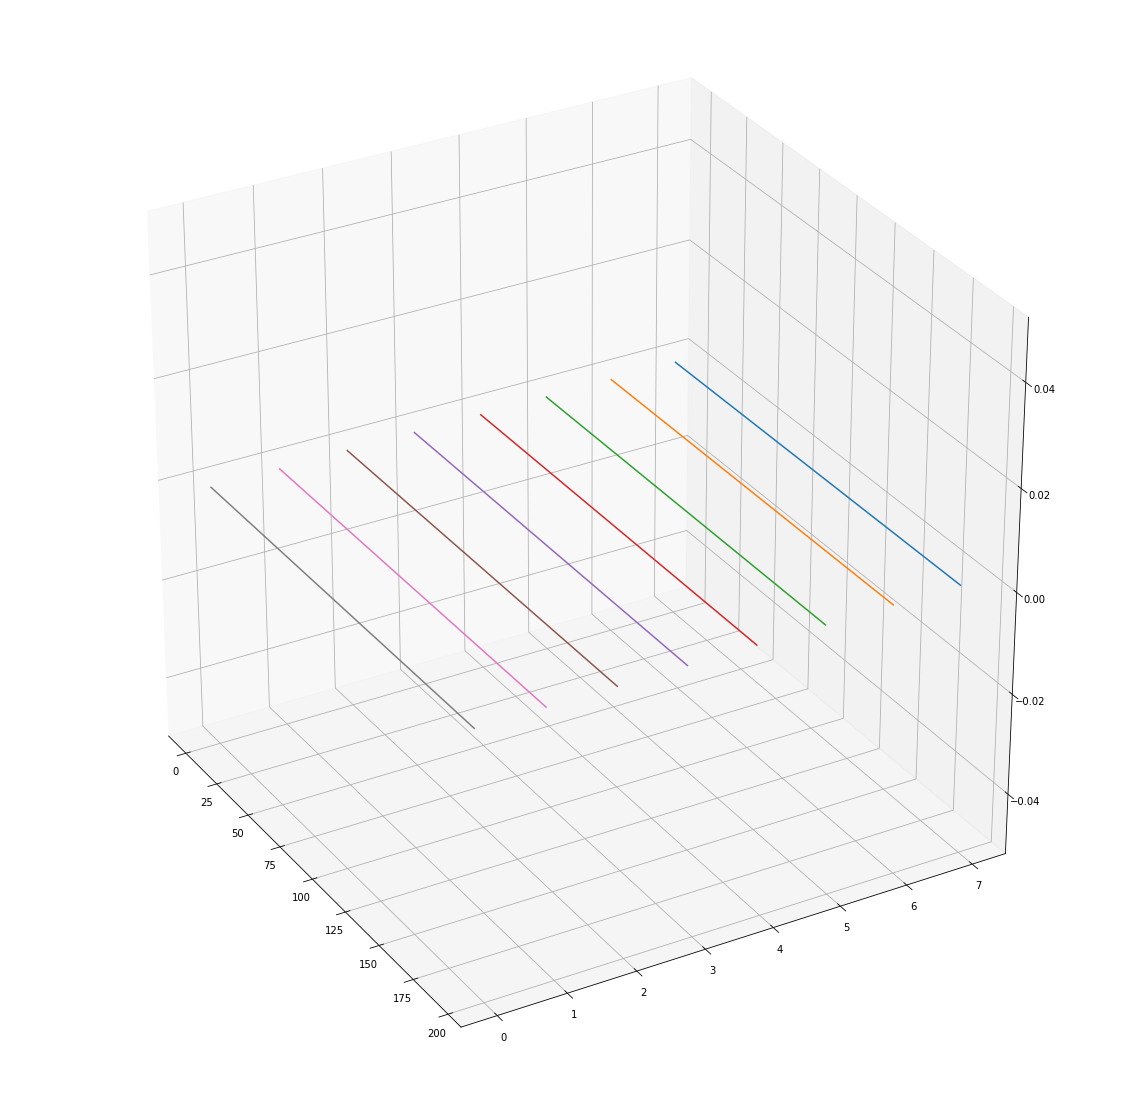

In [23]:

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(20,20))

datasets = [{"x":np.arange(0, len(signal[:,i]), 1) , "z":signal[:,i], "y":[i for _ in range(len(signal[:,i]))]} for i in range(8)]

ax.view_init(30, -30)

for dataset in datasets[::-1]:
    ax.plot(dataset["x"], dataset["y"], dataset["z"])

plt.show()

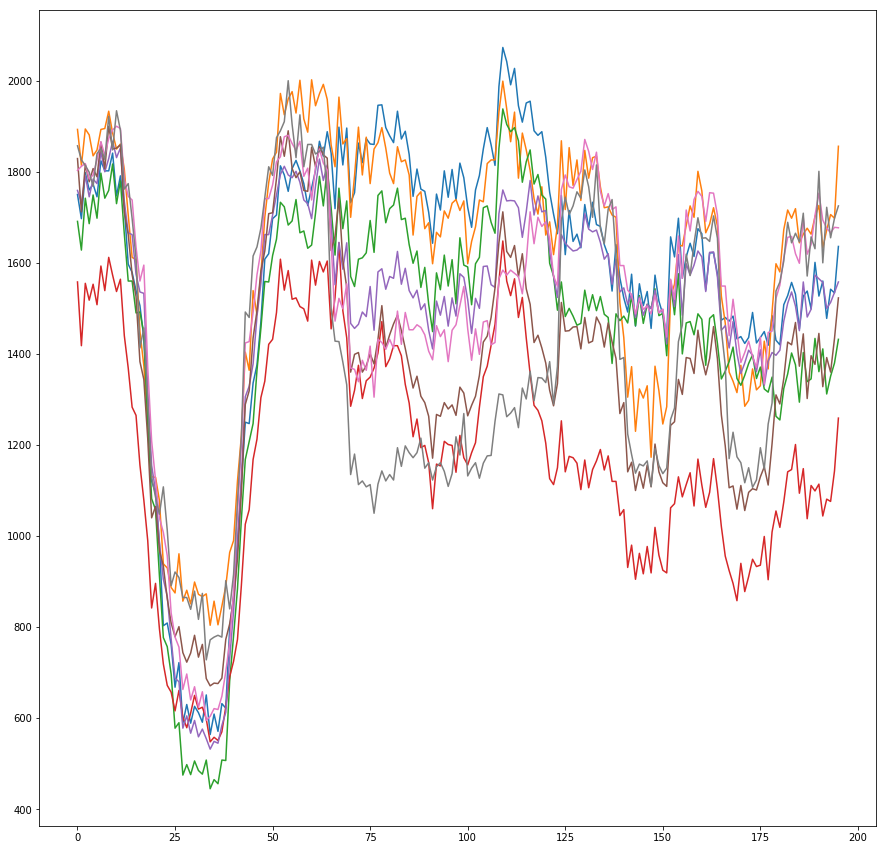

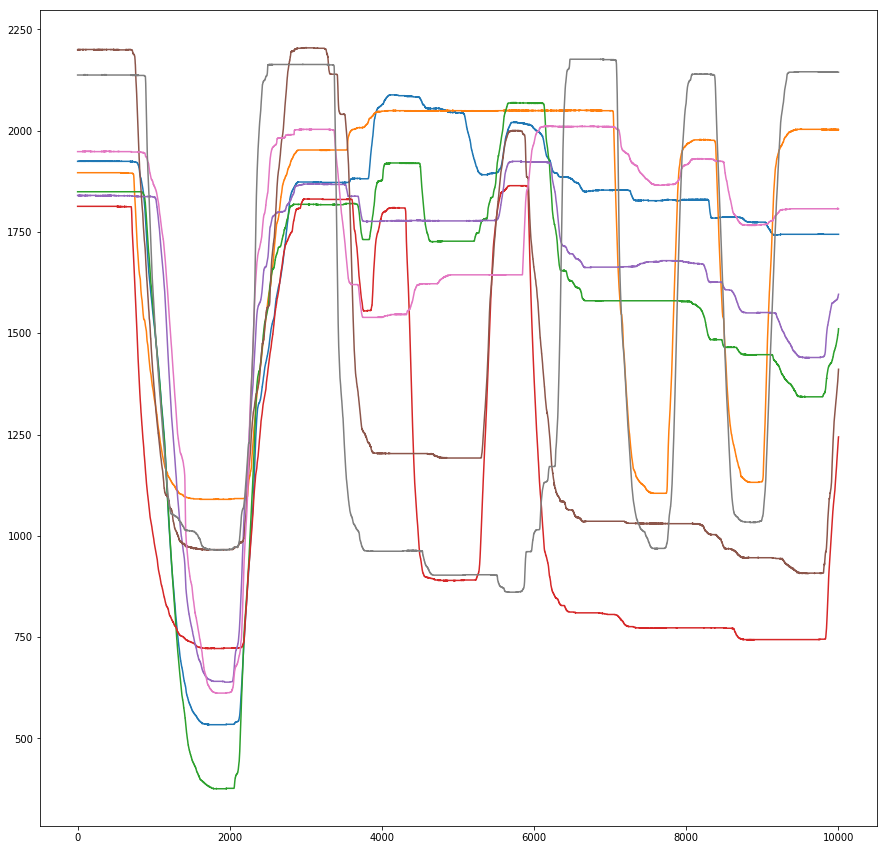

In [29]:
recording_number = 2
read_record_file("signal_predict"+str(recording_number)+".txt")
plt.figure(figsize=(15, 15))
plt.plot(hand)
plt.show()

read_record_file("signal_record_fix"+str(recording_number)+".txt")
plt.figure(figsize=(15, 15))
plt.plot(hand)
plt.show()

In [30]:
emg = []
pot = []

def process_data():
    global emg
    global pot
    for i in range(int(len(signal)/100)-3):
        emg.append(signal[100*i : 100*(i+3)])
        pot.append(hand[100*(i+3)])

    emg = np.array(emg)
    pot = np.array(pot)

process_data()
print(pot[:20])
# for i in emg:
#     print(i.shape)


[[1924. 1896. 1849. 1813. 1839. 2199. 1948. 2137.]
 [1924. 1896. 1849. 1813. 1839. 2200. 1949. 2137.]
 [1924. 1896. 1849. 1813. 1839. 2199. 1948. 2137.]
 [1924. 1895. 1849. 1812. 1839. 2199. 1948. 2137.]
 [1924. 1895. 1849. 1812. 1839. 2199. 1948. 2137.]
 [1914. 1667. 1849. 1418. 1837. 1975. 1947. 2136.]
 [1761. 1511. 1796. 1142. 1837. 1665. 1935. 2067.]
 [1530. 1348. 1545.  993. 1836. 1376. 1866. 1577.]
 [1330. 1216. 1324.  880. 1701. 1185. 1764. 1303.]
 [1028. 1144. 1039.  810. 1407. 1086. 1552. 1082.]
 [ 783. 1113.  753.  772. 1132. 1010. 1290. 1047.]
 [ 642. 1097.  570.  748.  948.  979. 1166. 1018.]
 [ 572. 1092.  450.  737.  774.  970.  878. 1012.]
 [ 543. 1091.  405.  725.  693.  967.  752.  993.]
 [ 535. 1090.  385.  723.  649.  966.  640.  968.]
 [ 534. 1090.  376.  722.  641.  966.  613.  966.]
 [ 534. 1090.  376.  722.  641.  966.  612.  966.]
 [ 535. 1091.  377.  723.  639.  966.  614.  967.]
 [ 542. 1092.  414.  723.  727.  972.  685.  974.]
 [ 780. 1093.  793.  779. 1085.

In [32]:
# print(signal[:10])
tsignal = list(zip(*signal))
# print(tsignal[3][:10])
print(len(tsignal[3]))

10003


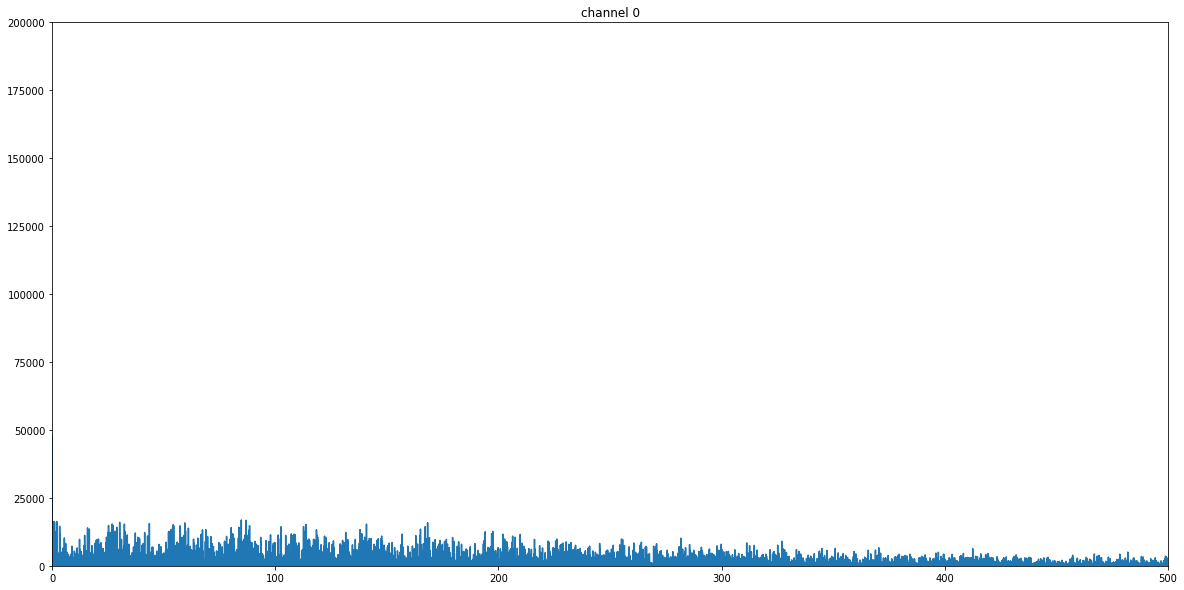

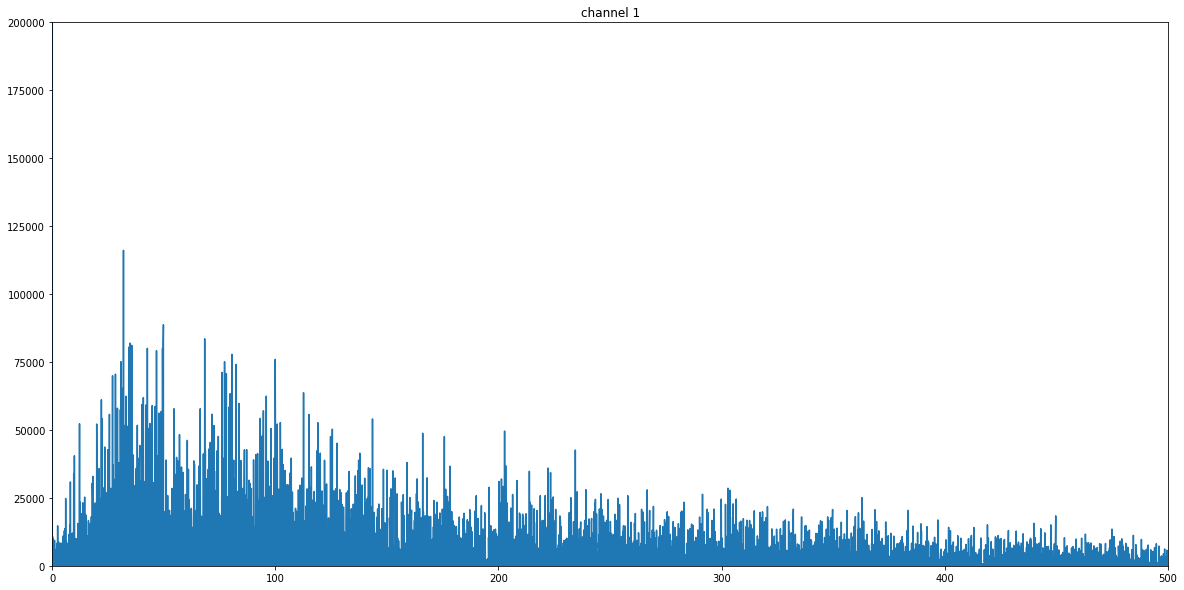

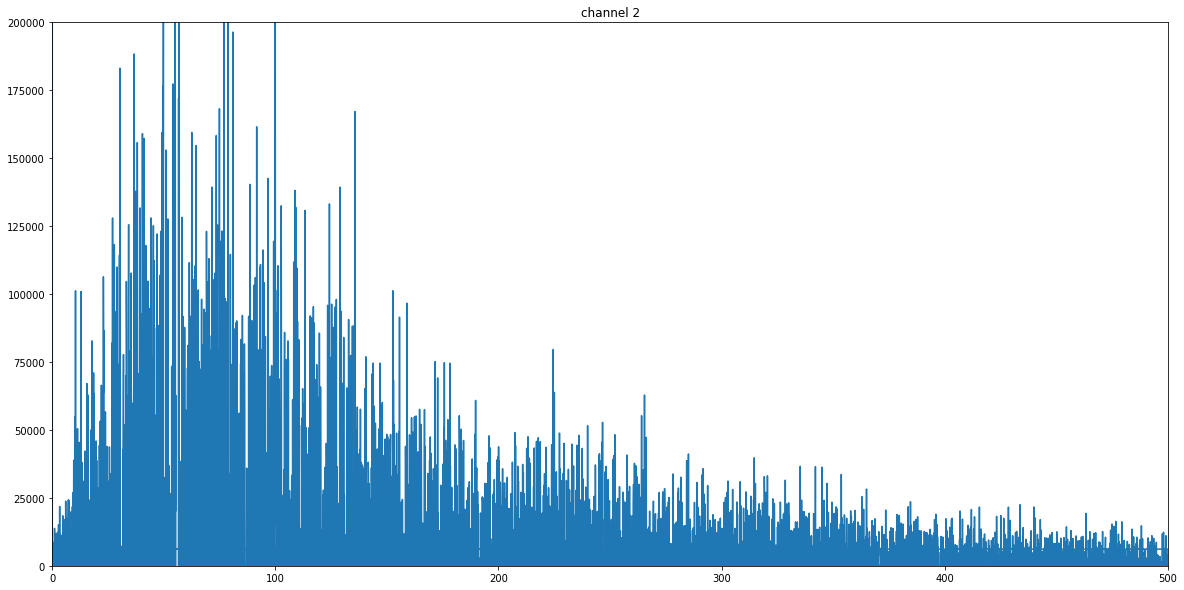

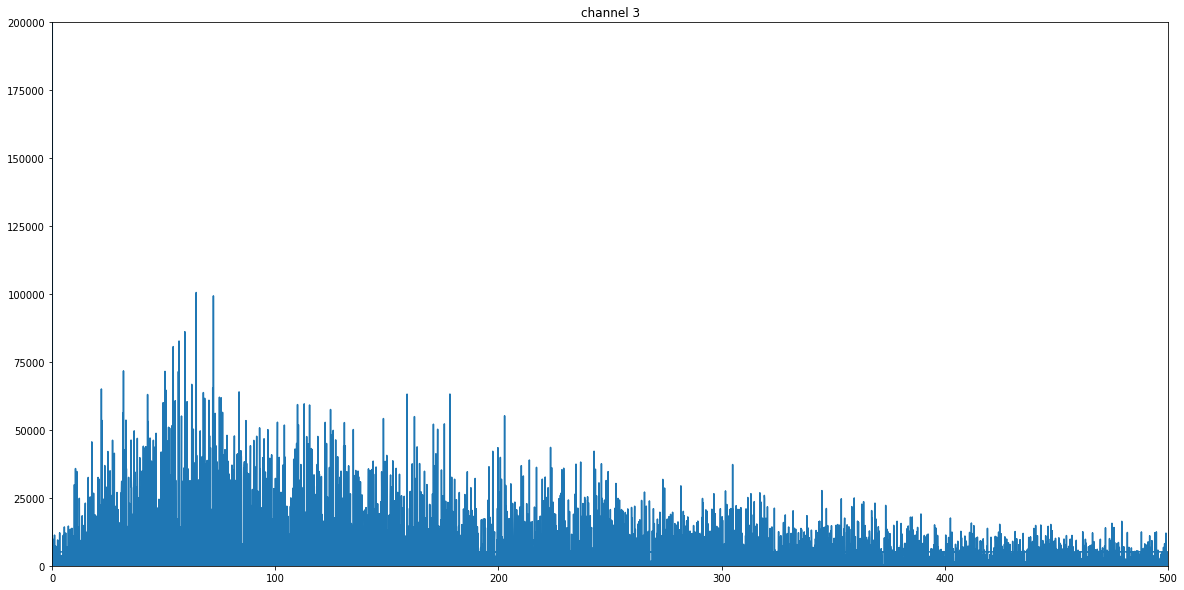

In [33]:
# np.fft.fft?
fourierSig = [np.fft.fft(tsignal[i]) for i in range(4)]
freqSig = np.fft.fftfreq(len(tsignal[3]), d=0.001)

# fourierSig = list(zip(*fourierSig))

for i in range(4):
    plt.figure(figsize=(20, 10))
    plt.title("channel " + str(i))
    plt.plot(freqSig, fourierSig[i].real)
    plt.axis([0, 500, 0, 200000])
    plt.show()

C:\Users\Dn\Anaconda3\envs\senoir-project\lib\site-packages\matplotlib\axes\_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


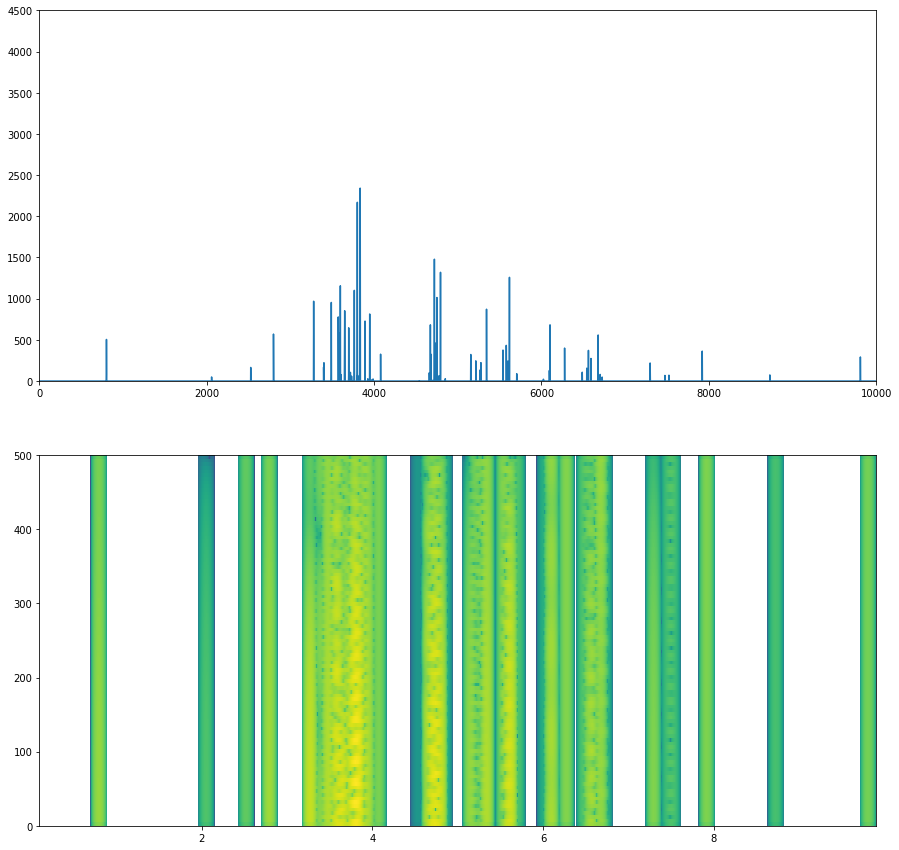

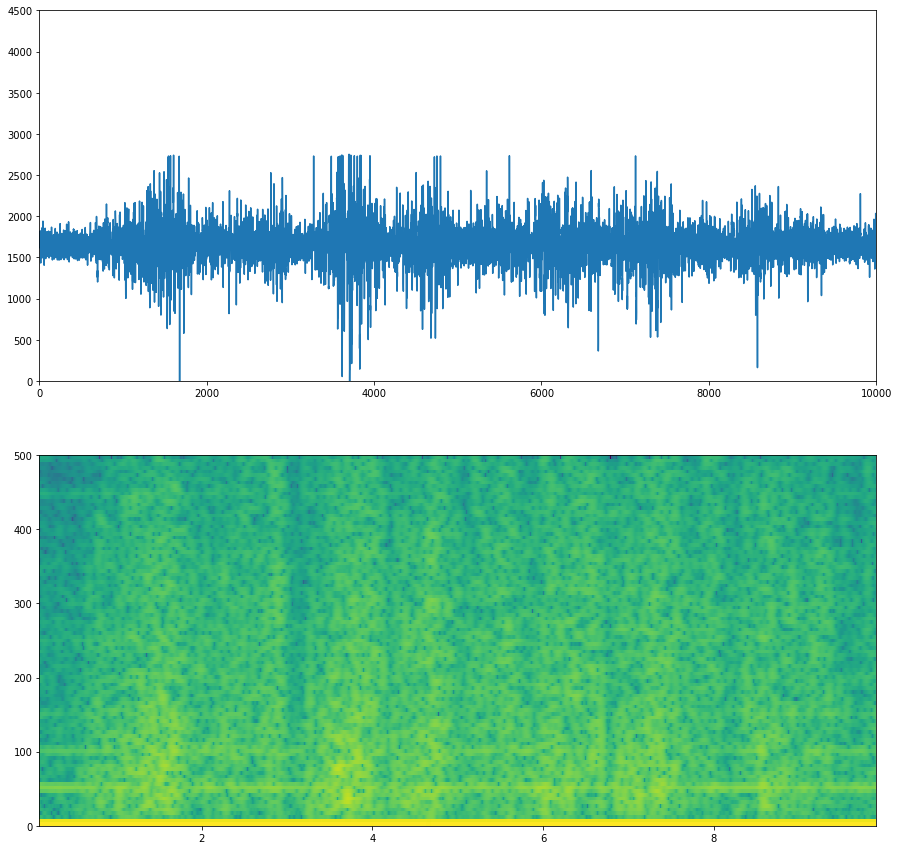

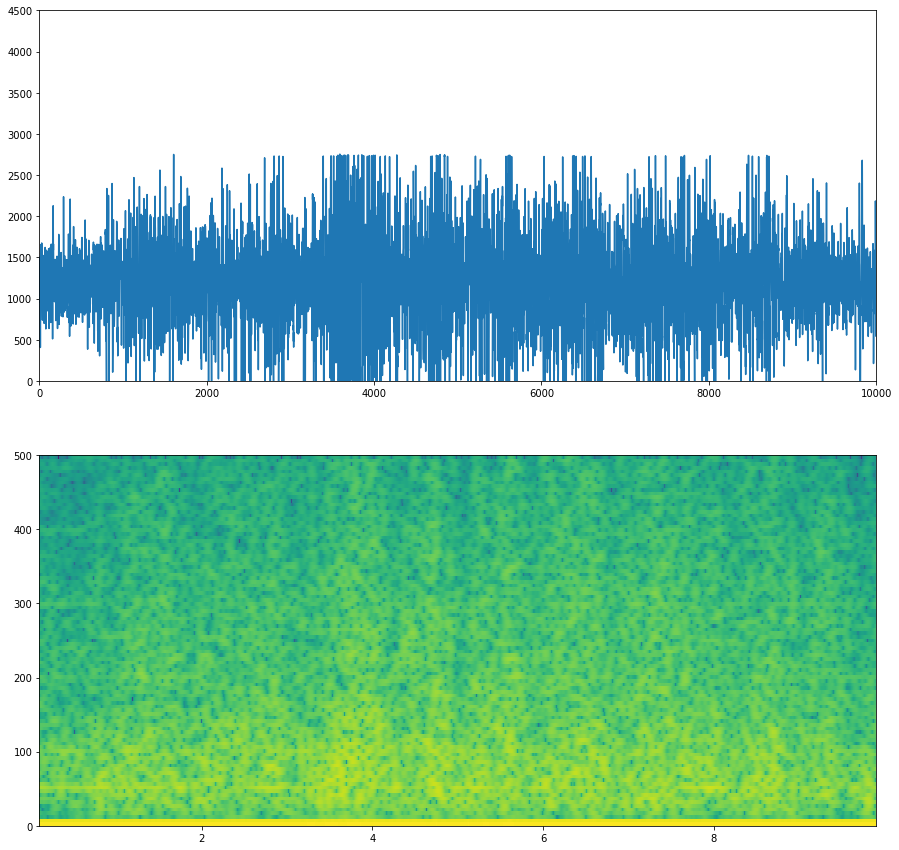

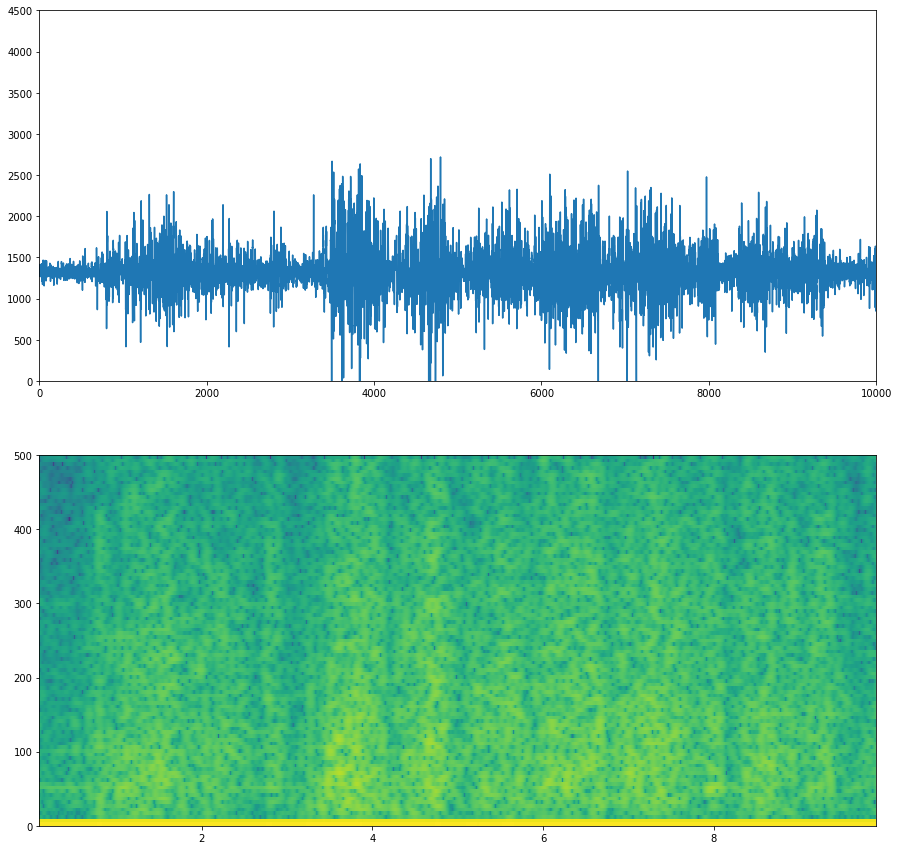

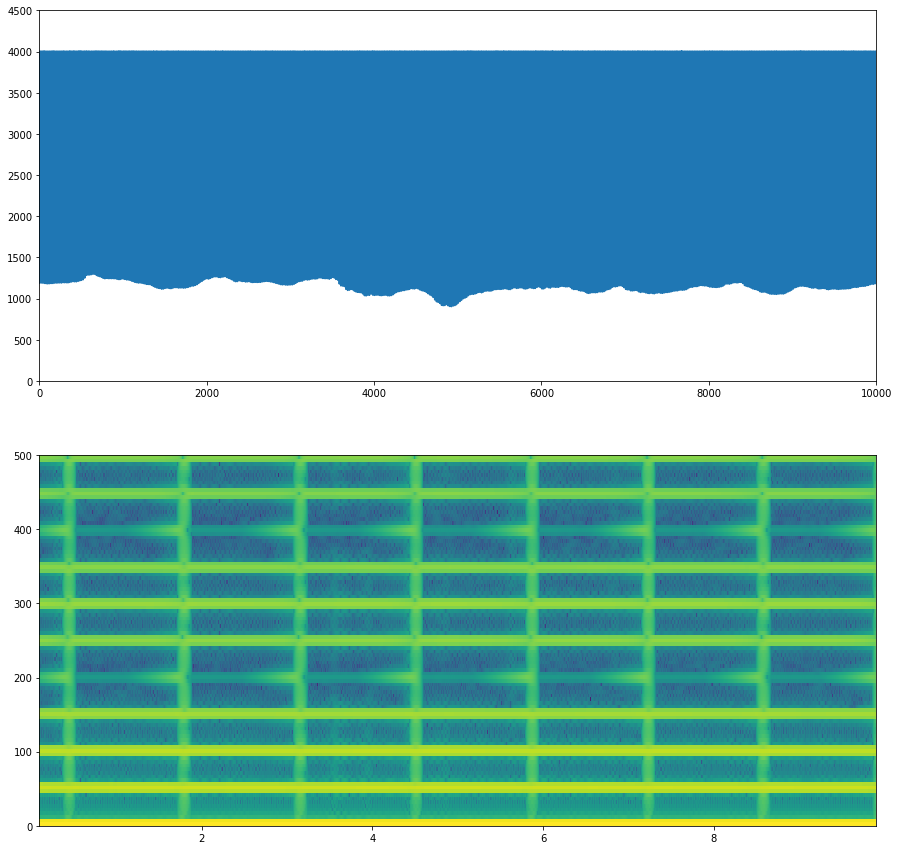

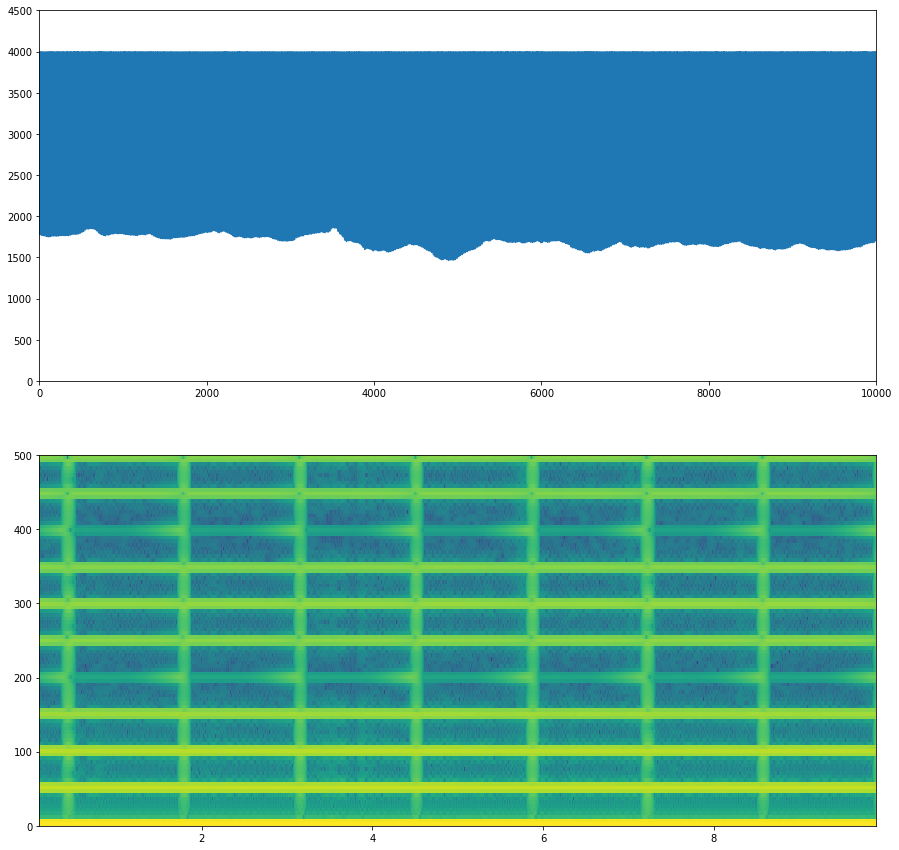

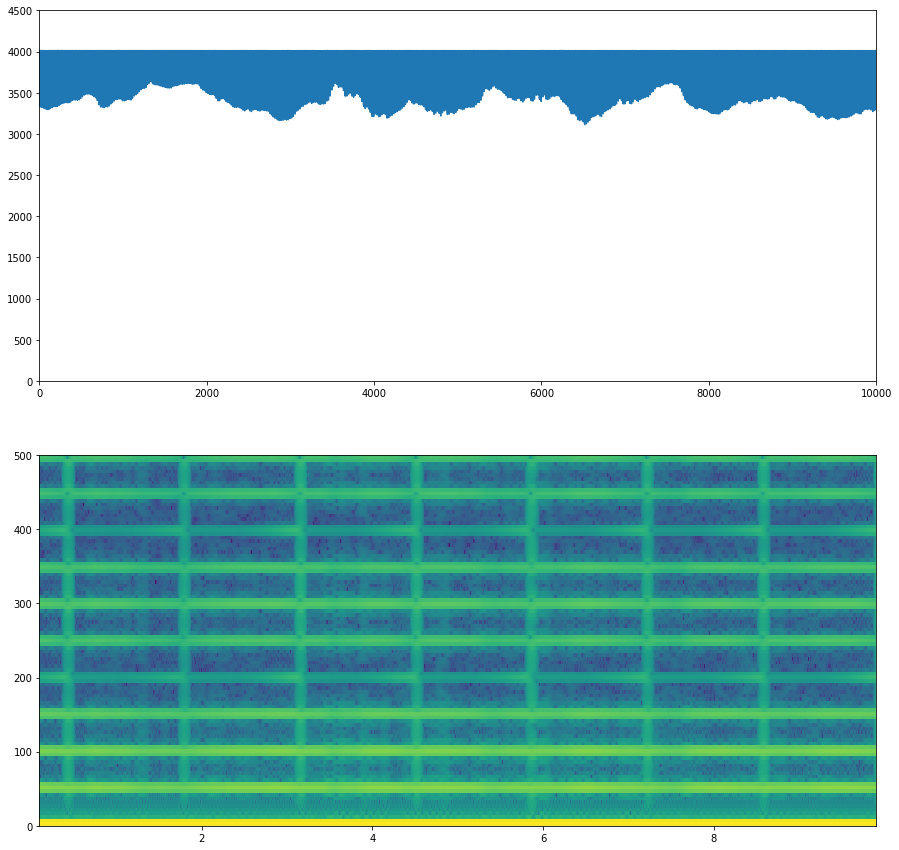

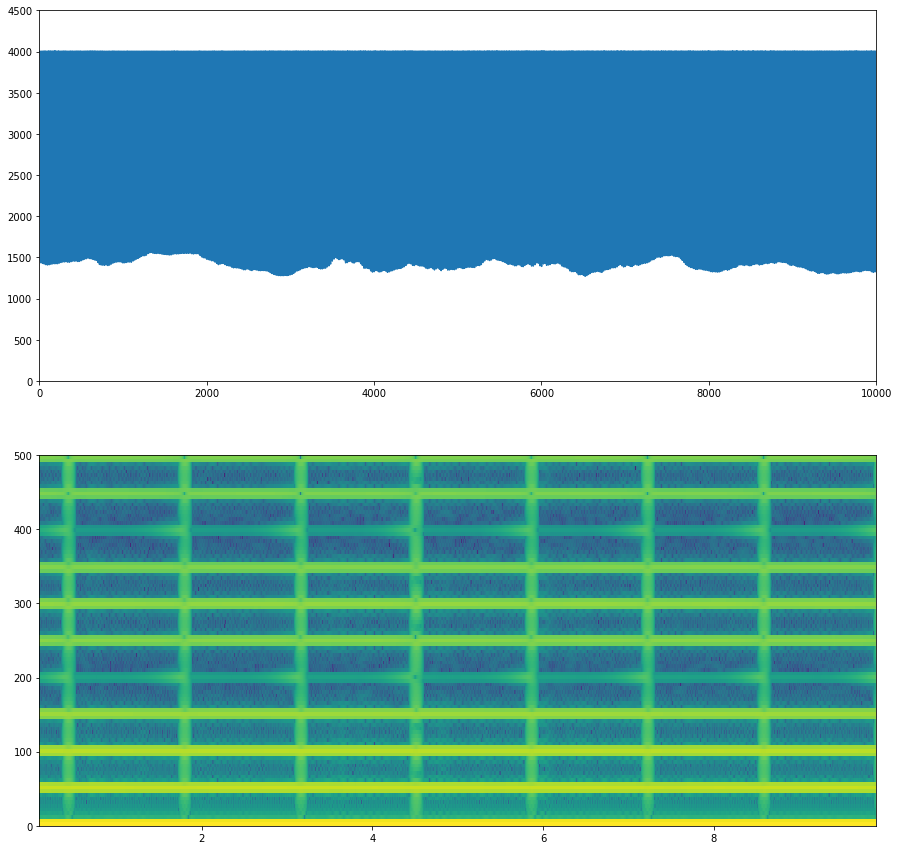

In [34]:
NFFT = 200
Fs = 1000

for i in range(8):
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 15))
    ax1.set_ylim(0, 4500)
    ax1.set_xlim(0, len(tsignal[i]))
    ax1.plot(tsignal[i])
    Pxx, freqs, bins, im = ax2.specgram(tsignal[i], NFFT=NFFT, Fs=Fs, noverlap=199)
    plt.show()